# Lead Scoring Case Study

### The steps that we will follow are as below:
1. Reading and interpreting data
2. Data Cleaning
3. Preparing the data for modelling (dummy columns, train-test data, rescaling data)
4. Training the model
5. Predicting and evaluting Model on the test data (metrics test)


## Step 1: Reading and interpreting data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Read file
leads = pd.read_csv('Leads.csv')

#### Understand the stats

In [4]:
#Understand data
leads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.sample(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3517,8fcfd8b7-f112-4958-ae58-81adfef42609,626816,Landing Page Submission,Google,Yes,No,0,3.0,337,3.00,Email Bounced,India,Retail Management,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Bounced
8071,6cd7f6d3-4781-436d-978d-7381106e4f2b,588051,Lead Add Form,Reference,No,No,1,NaN,341,NaN,Had a Phone Conversation,NaN,Business Administration,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Other Cities of Maharashtra,02.Medium,01.High,14.0,19.0,No,No,Modified
7448,ed0fbe2d-bfa1-449b-9b26-65e359fa4b53,592425,Landing Page Submission,Direct Traffic,No,No,1,5.0,933,5.00,SMS Sent,India,IT Projects Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,15.0,15.0,No,Yes,SMS Sent
5141,8bb7572f-c617-4af2-a19e-17d0e9de0d12,610511,Lead Add Form,Reference,No,No,1,0.0,0,0.00,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Select,Select,NaN,NaN,NaN,NaN,No,No,Email Opened
6674,84f33ea1-412d-4def-b7d9-a32ad9af66e4,598621,Landing Page Submission,Google,No,No,0,5.0,408,5.00,Email Opened,India,Travel and Tourism,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,Email Opened
7090,a5a88749-9193-4fb9-ad15-13ac1b397906,595176,Landing Page Submission,Google,No,No,0,3.0,135,1.50,SMS Sent,India,Operations Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Other Cities,NaN,NaN,NaN,NaN,No,No,SMS Sent
6526,b33636e2-3453-461d-b116-90c0ccd739d9,599700,API,Google,Yes,No,1,9.0,1046,1.80,SMS Sent,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Metro Cities,NaN,NaN,NaN,NaN,No,Yes,SMS Sent
7018,7d950033-775f-4f51-8c63-f7d39dc11539,595797,Landing Page Submission,Direct Traffic,No,No,1,5.0,1763,1.67,SMS Sent,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Cities,NaN,NaN,NaN,NaN,No,Yes,SMS Sent
7677,5bdb9b45-42b6-42b9-b37f-26baaea6c574,590924,API,Olark Chat,No,No,0,0.0,0,0.00,Email Opened,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,16.0,15.0,No,No,Email Opened
4370,08eca4e1-476f-4236-9ef3-5c150aade006,617845,Landing Page Submission,Direct Traffic,No,No,1,4.0,646,2.00,Email Link Clicked,India,Finance Management,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Email Link Clicked


- Target variable is 'Converted'
    - 0: Not converted
    - 1: Converted 

In [8]:
# Imbalance % for target
leads.Converted.value_counts(normalize=True)


0    0.61461
1    0.38539
Name: Converted, dtype: float64

<AxesSubplot:ylabel='Converted'>

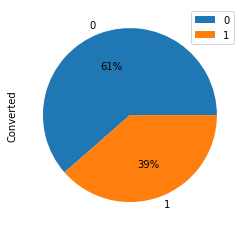

In [9]:
leads.Converted.value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True)

## Step 2: Data Cleaning


In [10]:
# Fix rows delete duplicates

leads.drop_duplicates(inplace=True)

In [11]:
leads.shape

(9240, 37)

In [12]:
#Identify missing values
leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
cat_col = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [15]:
#Check the unique values for each categorical column
for col in cat_col:
    print(col,  leads[col].unique())
    print('---------------')
        

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
---------------
Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
---------------
Do Not Email ['No' 'Yes']
---------------
Do Not Call ['No' 'Yes']
---------------
Converted [0 1]
---------------
Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
---------------
Country [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United A

- We observe value 'Select' in some columns which is nothing but Null. So we will repplace them

In [16]:
leads[['Specialization','How did you hear about X Education','Lead Profile','City']]=leads[['Specialization','How did you hear about X Education','Lead Profile','City']].replace('Select',np.nan)

In [17]:
#Recheck 'Select' value
for col in ['Specialization','How did you hear about X Education','Lead Profile','City']:
    print(col,  leads[col].unique())
    print('---------------')
        

Specialization [nan 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
---------------
How did you hear about X Education [nan 'Word Of Mouth' 'Other' 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']
---------------
Lead Profile [nan 'Potential Lead' 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool']
---------------
City [nan 'Mumbai' 'Thane & Outskirts' 'Other Metro Cities' 'Other Cities'
 'Other Cities of Maharashtra' 'Tier II Cities']
---------------


In [18]:
#missing %
null_perc = leads.isnull().mean()*100

- Columns with >40% missing values to be dropped

In [19]:
null_perc[null_perc>40]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [20]:
drop_col = null_perc[null_perc>40].index.to_list()

- Also columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' have all the records with value 'No', hence can not be used as a driving factor, can be dropped

In [21]:
drop_col.extend(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','Tags'])

In [22]:
drop_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Tags']

In [23]:
leads.drop(drop_col, axis=1, inplace=True)

In [24]:
leads.shape

(9240, 24)

In [25]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


In [26]:
leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [27]:
#Fill blanks in Country with India where city is an Indian city
leads.loc[leads.Country.isnull() & leads.City.notnull(), 'Country']='India'

In [28]:
leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          22.240260
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [29]:
leads.Country.value_counts()

India                   6898
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

- Majority of the leads are from India. Rest of the countries we will club together As 'Others'

In [30]:
leads.loc[leads.Country!='India', 'Country'] = 'Others'

In [31]:
leads.Country.value_counts()

India     6898
Others    2342
Name: Country, dtype: int64

In [32]:
leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [33]:
#Replace null Specialization with Finance Management as it being a Mode
leads.Specialization.fillna(leads.Specialization.mode()[0], inplace=True)


In [34]:
leads.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [35]:
#Rename long column names
leads.rename(columns={'What is your current occupation':'Occupation', 'What matters most to you in choosing a course':'Reason', 'Total Time Spent on Website':'Time Spent','A free copy of Mastering The Interview':'Free Copy'}, inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Time Spent',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'Occupation', 'Reason', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'City', 'Free Copy',
       'Last Notable Activity'],
      dtype='object')

In [36]:
leads.Occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [37]:
leads.Occupation.fillna(leads.Occupation.mode()[0], inplace=True)

In [38]:
leads.Occupation.value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [39]:
leads.isnull().mean()*100

Prospect ID                 0.000000
Lead Number                 0.000000
Lead Origin                 0.000000
Lead Source                 0.389610
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 1.482684
Time Spent                  0.000000
Page Views Per Visit        1.482684
Last Activity               1.114719
Country                     0.000000
Specialization              0.000000
Occupation                  0.000000
Reason                     29.318182
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

- All the occupations other than Unemployed and working professional, we will club under Other.

In [40]:
leads.loc[(leads.Occupation !='Unemployed') & (leads.Occupation!='Working Professional'),'Occupation']='Other'

In [41]:
leads.Occupation.value_counts()

Unemployed              8290
Working Professional     706
Other                    244
Name: Occupation, dtype: int64

In [42]:
leads.Reason.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: Reason, dtype: int64

In [43]:
leads.loc[leads.Reason !='Better Career Prospects', 'Reason']='Other'

In [44]:
leads.isnull().mean()*100

Prospect ID                 0.000000
Lead Number                 0.000000
Lead Origin                 0.000000
Lead Source                 0.389610
Do Not Email                0.000000
Do Not Call                 0.000000
Converted                   0.000000
TotalVisits                 1.482684
Time Spent                  0.000000
Page Views Per Visit        1.482684
Last Activity               1.114719
Country                     0.000000
Specialization              0.000000
Occupation                  0.000000
Reason                      0.000000
Search                      0.000000
Newspaper Article           0.000000
X Education Forums          0.000000
Newspaper                   0.000000
Digital Advertisement       0.000000
Through Recommendations     0.000000
City                       39.707792
Free Copy                   0.000000
Last Notable Activity       0.000000
dtype: float64

In [45]:
leads.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [46]:
leads.City.fillna('Other Cities', inplace=True)

In [47]:
leads.isnull().mean()*100

Prospect ID                0.000000
Lead Number                0.000000
Lead Origin                0.000000
Lead Source                0.389610
Do Not Email               0.000000
Do Not Call                0.000000
Converted                  0.000000
TotalVisits                1.482684
Time Spent                 0.000000
Page Views Per Visit       1.482684
Last Activity              1.114719
Country                    0.000000
Specialization             0.000000
Occupation                 0.000000
Reason                     0.000000
Search                     0.000000
Newspaper Article          0.000000
X Education Forums         0.000000
Newspaper                  0.000000
Digital Advertisement      0.000000
Through Recommendations    0.000000
City                       0.000000
Free Copy                  0.000000
Last Notable Activity      0.000000
dtype: float64

In [48]:
leads.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [49]:
leads.TotalVisits.describe()
leads.TotalVisits.median()

3.0

- mean and median are very close, so lets replace nulls with median for TotalVisits

In [50]:
leads.TotalVisits.fillna(leads.TotalVisits.median(), inplace=True)

In [51]:
leads.isnull().mean()*100

Prospect ID                0.000000
Lead Number                0.000000
Lead Origin                0.000000
Lead Source                0.389610
Do Not Email               0.000000
Do Not Call                0.000000
Converted                  0.000000
TotalVisits                0.000000
Time Spent                 0.000000
Page Views Per Visit       1.482684
Last Activity              1.114719
Country                    0.000000
Specialization             0.000000
Occupation                 0.000000
Reason                     0.000000
Search                     0.000000
Newspaper Article          0.000000
X Education Forums         0.000000
Newspaper                  0.000000
Digital Advertisement      0.000000
Through Recommendations    0.000000
City                       0.000000
Free Copy                  0.000000
Last Notable Activity      0.000000
dtype: float64

In [52]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- mean and median are very close, so lets replace nulls with median for Page views

In [53]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

In [54]:
leads.isnull().mean()*100

Prospect ID                0.000000
Lead Number                0.000000
Lead Origin                0.000000
Lead Source                0.389610
Do Not Email               0.000000
Do Not Call                0.000000
Converted                  0.000000
TotalVisits                0.000000
Time Spent                 0.000000
Page Views Per Visit       0.000000
Last Activity              1.114719
Country                    0.000000
Specialization             0.000000
Occupation                 0.000000
Reason                     0.000000
Search                     0.000000
Newspaper Article          0.000000
X Education Forums         0.000000
Newspaper                  0.000000
Digital Advertisement      0.000000
Through Recommendations    0.000000
City                       0.000000
Free Copy                  0.000000
Last Notable Activity      0.000000
dtype: float64

In [55]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [56]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)

In [57]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [58]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)

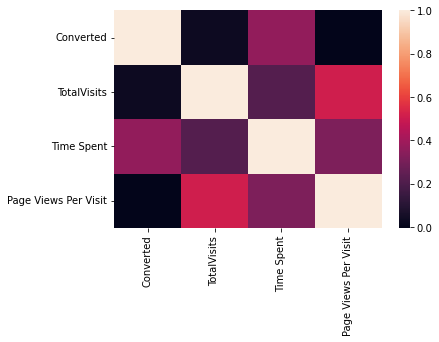

In [59]:
#Correlation between continuos columns
sns.heatmap(leads[['Converted','TotalVisits','Time Spent','Page Views Per Visit']].corr())
plt.show()

## Step 3: Prepare data for modeling

In [60]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Prospect ID              9240 non-null   object 
 1   Lead Number              9240 non-null   int64  
 2   Lead Origin              9240 non-null   object 
 3   Lead Source              9240 non-null   object 
 4   Do Not Email             9240 non-null   object 
 5   Do Not Call              9240 non-null   object 
 6   Converted                9240 non-null   int64  
 7   TotalVisits              9240 non-null   float64
 8   Time Spent               9240 non-null   int64  
 9   Page Views Per Visit     9240 non-null   float64
 10  Last Activity            9240 non-null   object 
 11  Country                  9240 non-null   object 
 12  Specialization           9240 non-null   object 
 13  Occupation               9240 non-null   object 
 14  Reason                  

In [61]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified


### Step 3.1: Converting binary categorical variables Y/N to 1/0

In [62]:
#identify binary cat vars
binary_col = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Free Copy']

binary_dict = {"Yes":1,"No":0}

leads[binary_col]=leads[binary_col].replace(binary_dict)

In [63]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free Copy,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Other Cities,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Other Cities,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Better Career Prospects,0,0,0,0,0,0,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Mumbai,0,Modified


### Step 3.2: Create dummy

-For categorical vars with multiple levels, create dummy

In [64]:
dummy1= pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','Country','Specialization','Occupation','Reason','City','Last Notable Activity']],drop_first=True)
leads=pd.concat([leads,dummy1],axis=1)

In [65]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Country,Specialization,Occupation,Reason,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free Copy,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Other Cities,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,Other Cities,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Better Career Prospects,0,0,0,0,0,0,Mumbai,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submissio

#### Dropping the original valiables

In [66]:
#drop the original variables
leads=leads.drop(['Lead Origin','Lead Source','Last Activity','Country','Specialization','Occupation','Reason','City','Last Notable Activity'],axis=1)

In [67]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Time Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9240 non-null   object 
 1   Lead Number                                         9240 non-null   int64  
 2   Do Not Email                                        9240 non-null   int64  
 3   Do Not Call                                         9240 non-null   int64  
 4   Converted                                           9240 non-null   int64  
 5   TotalVisits                                         9240 non-null   float64
 6   Time Spent                                          9240 non-null   int64  
 7   Page Views Per Visit                                9240 non-null   float64
 8   Search                                              9240 non-null   int64  
 9

In [69]:
#Convert TotalVisits to int
leads['TotalVisits']=leads.TotalVisits.astype(int)

In [70]:
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Time Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2.0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Step 3.3: Split Test-Train Data

In [71]:
#Putting feature variables to X
X = leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)

In [72]:
#Putting response variable to y
y = leads['Converted']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Step 3.4: Feature Scaling

In [74]:
scaler=StandardScaler()

In [75]:
X_train[['TotalVisits','Time Spent','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Time Spent','Page Views Per Visit']])

In [76]:
X_train.shape

(6468, 93)

### Step 3.5: Feature Selection-RFE
#### Since column list is huge, we will first use RFE for 15 features selection 

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [79]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 50),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', False, 51),
 ('Search', False, 20),
 ('Newspaper Article', False, 15),
 ('X Education Forums', False, 48),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 36),
 ('Free Copy', False, 57),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 31),
 ('Lead Origin_Quick Add Form', False, 44),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', False, 23)

In [80]:
#Retain columns suggested by RFE
X_train_rfe = X_train[X_train.columns[rfe.support_]]

### Step 4: Train the Model

In [81]:
#Build model with X_train_rfe
X_train_sm=sm.add_constant(X_train_rfe)

log=sm.GLM(y_train,X_train_sm)
log_model=log.fit()
log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.13446
Method:                          IRLS   Log-Likelihood:                -2680.8
Date:                Wed, 05 Jul 2023   Deviance:                       867.56
Time:                        17:59:02   Pearson chi2:                     868.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5309
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.3198      0.008     38.894      0.000       0.304       0.336
Do Not Email                                      -0.1216      0.017     -7.032      0.000      -0.155      -0.088
Time Spent                                         0.1828      0.005     35.784      0.000       0.173       0.193
Lead Origin_Lead Add Form                          0.5204      0.020     26.365      0.000       0.482       0.559
Lead Source_Olark Chat                             0.1871      0.014     13.444      0.000       0.160       0.214
Lead Source_Welingak Website                       0.1787      0.043      4.178      0.000       0.095       0.263
Last Activity_Had a Phone Conversation             0.1373      0.111      1.235      0.217      -0.081       0.355
Last Activity_Olark Chat Conversation             -0.0786      0.018     -4.415      0.000      -0.113      -0.044
Last Activity_Resubscribed to emails               0.8091      0.367      2.205      0.027       0.090       1.528
Last Activity_SMS Sent                             0.1987      0.011     18.916      0.000       0.178       0.219
Specialization_Hospitality Management             -0.1029      0.040     -2.591      0.010      -0.181      -0.025
Occupation_Working Professional                    0.3189      0.018     17.790      0.000       0.284       0.354
Reason_Other                                      -0.1542      0.011    -14.380      0.000      -0.175      -0.133
Last Notable Activity_Had a Phone Conversation     0.3018      0.157      1.924      0.054      -0.006       0.609
Last Notable Activity_Modified                    -0.1088      0.010    -10.532      0.000      -0.129      -0.089
Last Notable Activity_Unreachable                  0.2927      0.080      3.643      0.000       0.135       0.450
==================================================================================================================
"""

### Step 4.1: Checking VIF

In [82]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
5,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
3,Lead Source_Olark Chat,1.64
13,Last Notable Activity_Modified,1.57
6,Last Activity_Olark Chat Conversation,1.56
2,Lead Origin_Lead Add Form,1.44
11,Reason_Other,1.43
4,Lead Source_Welingak Website,1.24
8,Last Activity_SMS Sent,1.23
1,Time Spent,1.22


#### All the features have vif below 5. So we will keep this a final list.


In [83]:
#Parameters for the final model
log_model.params

const                                             0.319789
Do Not Email                                     -0.121590
Time Spent                                        0.182821
Lead Origin_Lead Add Form                         0.520396
Lead Source_Olark Chat                            0.187147
Lead Source_Welingak Website                      0.178706
Last Activity_Had a Phone Conversation            0.137343
Last Activity_Olark Chat Conversation            -0.078582
Last Activity_Resubscribed to emails              0.809135
Last Activity_SMS Sent                            0.198661
Specialization_Hospitality Management            -0.102859
Occupation_Working Professional                   0.318921
Reason_Other                                     -0.154207
Last Notable Activity_Had a Phone Conversation    0.301803
Last Notable Activity_Modified                   -0.108790
Last Notable Activity_Unreachable                 0.292718
dtype: float64

### Step 4.2: Confusion Matrix and Accuracy


In [84]:
#Getting the predicted values on the training data
y_train_pred=log_model.predict(X_train_sm)

In [85]:
y_train_pred[:10]

1871    0.345072
6795    0.320834
3516    0.380531
8105    0.768042
3934    0.236282
4844    1.177951
3297    0.186359
8071    1.139865
987     0.167560
7423    0.879436
dtype: float64

#### Creating a dataframe with y_train and y_train_pred

In [86]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred.values})

In [87]:
y_train_pred_final['LeadNumber']=y_train.index

In [88]:
y_train_pred_final

,Converted,Converted_prob,LeadNumber
0,0,0.345072,1871
1,0,0.320834,6795
2,0,0.380531,3516
3,0,0.768042,8105
4,0,0.236282,3934
...,...,...,...
6463,1,0.678320,350
6464,1,1.021427,79
6465,1,0.345072,8039
6466,0,0.128750,6936


In [89]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.5 else 0)

In [90]:
y_train_pred_final

,Converted,Converted_prob,LeadNumber,Predicted
0,0,0.345072,1871,0
1,0,0.320834,6795,0
2,0,0.380531,3516,0
3,0,0.768042,8105,1
4,0,0.236282,3934,0
...,...,...,...,...
6463,1,0.678320,350,1
6464,1,1.021427,79,1
6465,1,0.345072,8039,0
6466,0,0.128750,6936,0


In [91]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3572  430]
 [ 783 1683]]


In [92]:
#predicted      notconverted converted
#actual
#notconverted     3572        430
#converted        783         1683

In [93]:
#overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8124613481756339


#### Accuracy of the final model is 81%

### Step 4.3: Sensitivity & Specificity

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6824817518248175

In [96]:
# Let us calculate specificity
TN / float(TN+FP)

0.8925537231384307

In [97]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10744627686156921


In [98]:
# positive predictive value 
print (TP / float(TP+FP))

0.79649787032655


In [99]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8202066590126291


### Finding optimal cutoff
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.345072,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.320834,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.380531,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.768042,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.236282,3934,0,1,1,1,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.441404  0.997972  0.098451
0.1   0.1  0.572511  0.982563  0.319840
0.2   0.2  0.710266  0.949311  0.562969
0.3   0.3  0.785405  0.899838  0.714893
0.4   0.4  0.812152  0.798054  0.820840
0.5   0.5  0.812461  0.682482  0.892554
0.6   0.6  0.789270  0.545418  0.939530
0.7   0.7  0.754947  0.412003  0.966267
0.8   0.8  0.721398  0.295620  0.983758
0.9   0.9  0.682127  0.174777  0.994753


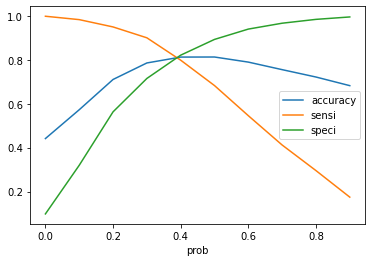

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,LeadNumber,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.345072,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.320834,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.380531,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.768042,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.236282,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812152133580705

In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3285,  717],
       [ 498, 1968]])

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7980535279805353

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.820839580209895

In [109]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17916041979010494


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7329608938547486


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8683584456780333


### Step 4.4: Precision and Recall

In [112]:
#Precision
print(TP/(FP+TP))

0.7329608938547486


In [113]:
#Recall
print(TP/(FN+TP))

0.7980535279805353


In [114]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

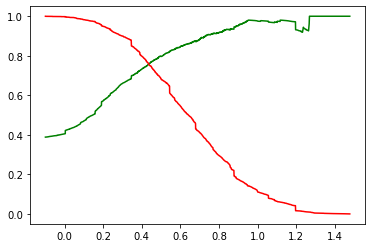

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 5: Making predictions on the test set

In [117]:
#Rescaling the test data
X_test[['TotalVisits','Time Spent','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Time Spent','Page Views Per Visit']])

In [118]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Time Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Unemployed,Occupation_Working Professional,Reason_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,0.857967,0.964504,2.613424,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0,0.290067,-0.777416,1.226321,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [119]:
#Retain only required columns
X_test=X_test[X_train_rfe.columns.to_list()]
X_test

,Do Not Email,Time Spent,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Specialization_Hospitality Management,Occupation_Working Professional,Reason_Other,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0,0.964504,0,0,0,0,0,0,1,0,0,1,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.885371,0,1,0,0,1,0,0,0,0,0,0,1,0
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,0,-0.354744,0,0,0,0,0,0,0,0,0,1,0,0,0
2152,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0,0,0
7101,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0
5331,1,2.056864,0,0,0,0,0,0,0,0,0,1,0,1,0


In [120]:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,Do Not Email,Time Spent,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Specialization_Hospitality Management,Occupation_Working Professional,Reason_Other,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,1.0,0,0.964504,0,0,0,0,0,0,1,0,0,1,0,0,0
2376,1.0,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0,0,0
7766,1.0,0,-0.777416,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,1.0,0,-0.885371,0,1,0,0,1,0,0,0,0,0,0,1,0
4359,1.0,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,-0.354744,0,0,0,0,0,0,0,0,0,1,0,0,0
2152,1.0,0,-0.885371,1,0,0,0,0,0,1,0,0,0,0,0,0
7101,1.0,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0
5331,1.0,1,2.056864,0,0,0,0,0,0,0,0,0,1,0,1,0


In [121]:
#find the predicted values of y test
y_test_pred = log_model.predict(X_test_sm)
y_test_pred

4269    0.540576
2376    0.876981
7766    0.789300
9199    0.157700
4359    0.678320
          ...   
8649    0.100728
2152    0.876981
7101    0.345072
5331    0.311241
2960    0.876981
Length: 2772, dtype: float64

In [122]:
# Converting y_test/y_test_pred to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred)



In [123]:
# Putting CustID to index
y_test_df['LeadNumber'] = y_test_df.index
y_test_df

,Converted,LeadNumber
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359
...,...,...
8649,0,8649
2152,1,2152
7101,0,7101
5331,0,5331


In [124]:
y_test_pred_df.rename(columns={0:'Converted_prob'}, inplace=True)

In [125]:
y_test_pred_df

,Converted_prob
4269,0.540576
2376,0.876981
7766,0.789300
9199,0.157700
4359,0.678320
...,...
8649,0.100728
2152,0.876981
7101,0.345072
5331,0.311241


In [126]:
y_test_final=pd.concat([y_test_df, y_test_pred_df], axis=1)
y_test_final

,Converted,LeadNumber,Converted_prob
4269,1,4269,0.540576
2376,1,2376,0.876981
7766,1,7766,0.789300
9199,0,9199,0.157700
4359,1,4359,0.678320
...,...,...,...
8649,0,8649,0.100728
2152,1,2152,0.876981
7101,0,7101,0.345072
5331,0,5331,0.311241


In [127]:
y_test_final['final_pred']=y_test_final.Converted_prob.apply(lambda x: 1 if x>0.4 else 0)

In [128]:
y_test_final

,Converted,LeadNumber,Converted_prob,final_pred
4269,1,4269,0.540576,1
2376,1,2376,0.876981,1
7766,1,7766,0.789300,1
9199,0,9199,0.157700,0
4359,1,4359,0.678320,1
...,...,...,...,...
8649,0,8649,0.100728,0
2152,1,2152,0.876981,1
7101,0,7101,0.345072,0
5331,0,5331,0.311241,0


In [129]:
confusion2 = metrics.confusion_matrix(y_test_final.Converted, y_test_final.final_pred)
confusion2

array([[1383,  294],
       [ 222,  873]])

In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_final.Converted, y_test_final.final_pred)

0.8138528138528138

In [131]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7972602739726027

In [133]:
# Let us calculate specificity
TN / float(TN+FP)

0.8246869409660107